In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

from copy import copy
from matplotlib.colors import LogNorm


### Load Processed Data

In [2]:
jet_pT    = np.load('jet_pT.npy')
cuts      = np.load('cuts.npy')
q_perp    = np.load('q_perp.npy')
asymm_phi = np.load('asymm_angle.npy')
weights   = np.load('weights.npy')

### Apply Cuts

In [3]:
if (len(q_perp) == len(cuts)):
    jet_pT    = jet_pT[cuts]
    q_perp    = q_perp[cuts]
    asymm_phi = asymm_phi[cuts]
    weights   = weights[cuts]
    print("%i / %i Events Remain"%(len(q_perp),len(cuts)))

else:
    print("Cuts already applied!")
    

7234716 / 57882501 Events Remain


In [4]:
unfold = True
if not(unfold):
    print("Weights set to 1.0")
    weights = np.ones(len(weights))

___

### 2D Asymmetry Histograms

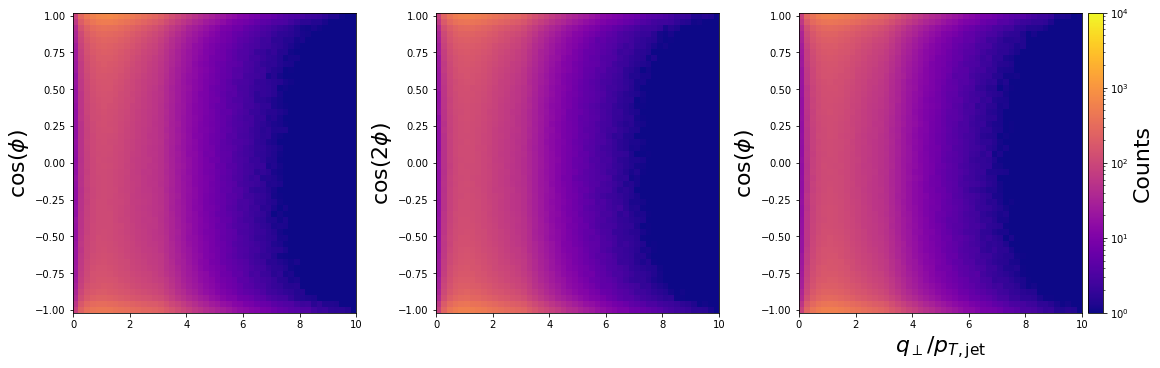

In [5]:
N_Bins = 51
xbins = np.linspace(-0.01,10.01,N_Bins)
ybins = np.linspace(-1.02,1.02,N_Bins)
cmap = copy(plt.cm.plasma)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 5), constrained_layout=True)

h1, xedges1, yedges1 = np.histogram2d(q_perp, np.cos(asymm_phi),bins=(xbins,ybins), weights=weights)
h2, xedges2, yedges2 = np.histogram2d(q_perp, np.cos(2*asymm_phi), bins=(xbins,ybins), weights=weights)
h3, xedges3, yedges3 = np.histogram2d(q_perp, np.cos(3*asymm_phi), bins=(xbins,ybins), weights=weights)

pcm = axes[0].pcolormesh(xedges1, yedges1, h1.T, cmap=cmap, norm=LogNorm(vmin=1.0e0,vmax=1.0e4), rasterized=True)
axes[1].pcolormesh(xedges1, yedges1, h2.T, cmap=cmap, norm=LogNorm(vmin=1.0e0,vmax=1.0e4), rasterized=True)
axes[2].pcolormesh(xedges1, yedges1, h3.T, cmap=cmap, norm=LogNorm(vmin=1.0e0,vmax=1.0e4), rasterized=True)

axes[0].set_ylabel("$\cos(\phi)$",fontsize=22)
axes[1].set_ylabel("$\cos(2\phi)$",fontsize=22)
axes[2].set_ylabel("$\cos(3\phi)$",fontsize=22)

cb = fig.colorbar(pcm, ax=axes, pad=0)

plt.ylabel("$\cos(\phi)$",fontsize=22)
plt.xlabel("$q_\perp/p_{T,\mathrm{jet}}$",fontsize=22)
cb.set_label("Counts",fontsize=22)

In [6]:
print(weights)
print(np.sum(weights))
print(len(weights))

[0.02045643 0.01417769 0.01292776 ... 0.01028257 0.00963581 0.04045691]
108961.12760274093
7234716


In [7]:
y_centers = (yedges1[:-1]+yedges1[1:])/2 #NEED unfolded assym Distribution bin avgs...
#qT = np.sum(h,axis=0)
mult = h1*y_centers
sums = np.sum(h1,axis=1)
errors = 1./np.sqrt(sums)
#asymm_v_qT = np.sum(mult,axis=1)/sums #weighted avg,
of_cosphi = np.sum(mult,axis=1)/sums #weighted avg,
qT_centers = (xedges1[:-1] + xedges1[1:]) / 2


In [8]:
print(of_cosphi)
#0.022069617059108124
#[ 0.02206962  0.04966203  0.0787484   0.1049393   0.12828567  0.14420846
#  0.15375495  0.15550619  0.14945049  0.13815208  0.12041934  0.1025869
#  0.08040149  0.05512374  0.03825799  0.01070044  0.00138113 -0.00985552
# -0.00914785 -0.01158511 -0.0085289  -0.00970368 -0.00415063 -0.00485503
# -0.00663891 -0.00789747  0.00342942 -0.00034261 -0.0040499   0.00670668
#  0.00648598  0.00671343  0.00492732  0.00389081  0.02060792  0.02976502
#  0.02180831  0.02202378  0.02455673  0.025296    0.03498861  0.01893387
#  0.04657093  0.05198037  0.05780785  0.05355955  0.05333494  0.05001891
#  0.03477592  0.08632153]

[ 0.01808653  0.04532627  0.06878705  0.09216795  0.11055034  0.1206835
  0.12789049  0.12785493  0.12154049  0.10840984  0.09190766  0.07486282
  0.05292643  0.03056214  0.01488967 -0.01376746 -0.02414681 -0.03643733
 -0.0385314  -0.04423492 -0.04374243 -0.04867534 -0.04452722 -0.04663884
 -0.05081209 -0.05223745 -0.04474078 -0.04855072 -0.05399902 -0.04431524
 -0.04473103 -0.04809538 -0.05219837 -0.05052831 -0.03737526 -0.02845815
 -0.03636548 -0.03771256 -0.03603715 -0.03830764 -0.0308858  -0.0429825
 -0.01742482 -0.00670885 -0.0132591  -0.01015425 -0.01798758 -0.01779797
 -0.0448954   0.00986265]


In [9]:
y_centers = (yedges2[:-1]+yedges2[1:])/2 #NEED unfolded assym Distribution bin avgs...
mult = h2*y_centers
sums = np.sum(h2,axis=1)
errors = 1./np.sqrt(sums)
of_cos2_phi = np.sum(mult,axis=1)/sums #weighted avg,

In [10]:
y_centers = (yedges3[:-1]+yedges3[1:])/2 #NEED unfolded assym Distribution bin avgs...
mult = h3*y_centers
sums = np.sum(h3,axis=1)
errors = 1./np.sqrt(sums)
of_cos3_phi = np.sum(mult,axis=1)/sums #weighted avg,

In [11]:
theory = {}

for i in range(1,4):
    key = "cos%i"%(i)
    theory[key] = np.load("theory_cos%iphi.npy"%(i))
    key = key+"_x"
    theory[key] = np.load("theory_cos%iphi_x.npy"%(i))

## Calculate Bin Average $q_\perp$

In [64]:
q_perp_avg = np.zeros(N_Bins-1)
weight_sum = np.zeros(N_Bins-1)

for i in range(0,len(q_perp)):
    
    if (q_perp[i] > q_max): continue
    ibin = digits[i]
    q_perp_avg[ibin] += q_perp[i]*weights[i]
    weight_sum[ibin] += weights[i]
    
    if (i%1000000==0):
        print(i,":","bin =",digits[i], "  ",q_perp_bins[digits[i]],q_perp[i],q_perp_bins[digits[i]+1])
        
q_perp_avg = q_perp_avg/weight_sum

print(q_perp_avg)

0 : bin = 3    0.6006 0.79072815 0.8008
1000000 : bin = 8    1.6016 1.7318053 1.8017999999999998
2000000 : bin = 7    1.4014 1.4352549 1.6016
3000000 : bin = 4    0.8008 0.96021295 1.001
4000000 : bin = 8    1.6016 1.730144 1.8017999999999998
5000000 : bin = 10    2.002 2.0067263 2.2022
6000000 : bin = 2    0.4004 0.56074613 0.6006
7000000 : bin = 6    1.2012 1.2361218 1.4014
[0.13321696 0.31050603 0.5056888  0.7033852  0.90179851 1.10107751
 1.30036435 1.50034356 1.70009558 1.90016813 2.10016416 2.30055352
 2.5009226  2.70122993 2.9014088  3.09951765 3.29923973 3.4995123
 3.69998891 3.9004088  4.10047687 4.30111115 4.50108532 4.70141871
 4.90188046 5.10260104 5.30285246 5.50238718 5.7033811  5.90377645
 6.10356404 6.30336645 6.50391451 6.70431004 6.90422104 7.10543283
 7.30643802 7.50545033 7.70556831 7.90518077 8.10500786 8.3065166
 8.5056648  8.7072693  8.90690921 9.10706171 9.30716254 9.50477043
 9.70894666 9.90755636]


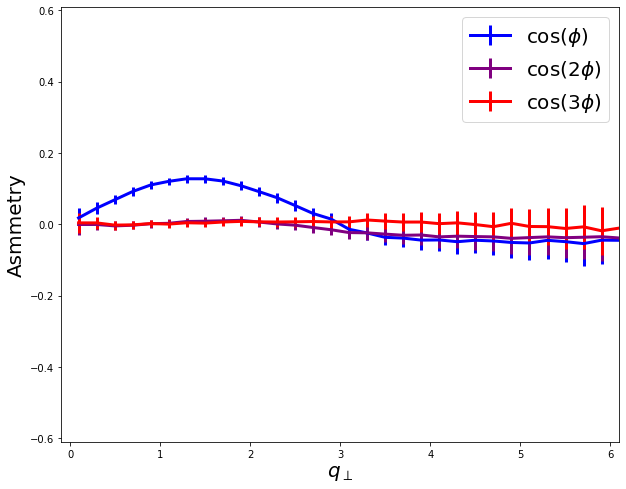

In [49]:
fig = plt.figure(figsize=(10,8))
plt.errorbar(qT_centers,of_cosphi,yerr=errors,label="$\cos(\phi)$",color="blue",linewidth=3)
plt.errorbar(qT_centers,of_cos2_phi,yerr=errors,label="$\cos(2\phi)$",color="purple",linewidth=3)
plt.errorbar(qT_centers,of_cos3_phi,yerr=errors,label="$\cos(3\phi)$",color="red",linewidth=3)
plt.xlim(-0.1,6.1)
plt.ylim(-.61,.61)
plt.legend(fontsize=20)
plt.xlabel("$q_\perp$",fontsize=20)
plt.ylabel("Asmmetry",fontsize=20)
plt.savefig("unfolded_separately.pdf")


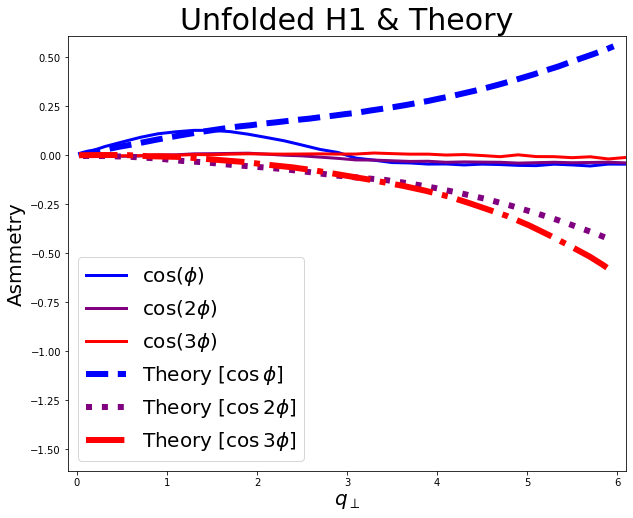

In [67]:
plot_theory = True

fig = plt.figure(figsize=(10,8))
plt.plot(q_perp_avg,of_cosphi,label="$\cos(\phi)$",color="blue",linewidth=3)
plt.plot(q_perp_avg,of_cos2_phi,label="$\cos(2\phi)$",color="purple",linewidth=3)
plt.plot(q_perp_avg,of_cos3_phi,label="$\cos(3\phi)$",color="red",linewidth=3)

if (plot_theory):
    plt.plot(theory['cos1_x'],theory['cos1'],label="Theory [$\cos\phi$]",linewidth=6,linestyle="dashed",color="blue")
    plt.plot(theory['cos2_x'],theory['cos2'],label="Theory [$\cos2\phi$]",linewidth=6,linestyle="dotted",color="purple")
    plt.plot(theory['cos3_x'],theory['cos3'],label="Theory [$\cos3\phi$]",linewidth=6,linestyle="dashdot",color="red")

plt.xlim(-0.1,6.1)
plt.ylim(-1.61,0.61)
plt.legend(fontsize=20)
plt.xlabel("$q_\perp$",fontsize=20)
plt.ylabel("Asmmetry",fontsize=20)

if (unfold):
    plt.savefig("overlay_theory_omnifold.pdf")
    plt.title("Unfolded H1 & Theory",fontsize=30)
    
else:
    plt.title("Rapgap & Theory",fontsize=30)
    plt.savefig("overlay_theory_rapgap.pdf")

___

In [63]:
q_max = 10.01
q_perp_bins = np.linspace(0,q_max,N_Bins)
digits = np.digitize(q_perp,q_perp_bins)
digits = digits-1
print(len(q_perp_bins))

51


In [65]:
print(len(q_perp_avg))

50


In [66]:
print(len(of_cosphi))

50
